### General Metrics

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics
from scipy import stats
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt



data = pd.read_csv("AllCollected.csv",parse_dates=True)
data.describe()


,ILI rates,flu,the flu,flu fever,flu cough,flu like,flu medicine,flu and cough,colds and flu,got flu,...,symptoms of arthritis,gout symptoms,fever adults,malaria medication,cold sores contagious,viral pneumonia,i have a sore throat,shingles jab,migraine treatment,stop tickly cough
count,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,...,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000
mean,9.015017,1790.906964,176.007278,28.231099,23.333207,36.355111,16.721315,9.358843,13.450199,16.255157,...,30.945083,51.770439,28.429419,8.980505,6.550710,9.163068,13.052511,1.990830,22.726127,6.007894
std,12.518105,3792.763355,224.121708,35.446697,29.074445,32.670947,22.417660,16.222707,23.471229,27.470761,...,29.700655,39.458917,29.914993,19.725562,12.637481,18.216539,16.845456,6.566380,26.096795,11.234567
min,1.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.725000,599.855084,72.616690,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,24.734450,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.920000,969.169855,124.679952,21.467188,16.844010,35.289560,14.601456,0.000000,0.000000,0.000000,...,29.623561,47.411502,24.651515,0.000000,0.000000,0.000000,0.000000,0.000000,18.453376,0.000000
75%,9.977855,1721.850455,218.769738,40.014423,35.532842,53.680246,26.557018,15.951339,18.433863,23.144368,...,44.702726,73.868098,43.247678,14.622820,14.220849,15.189842,21.898963,0.000000,33.264655,13.900000
max,148.500000,70894.611800,4758.568730,510.236844,237.052631,386.211375,238.864595,226.314884,233.533358,380.644184,...,352.670124,411.094654,250.618956,233.737214,187.163194,307.472604,173.195590,123.647766,284.433242,126.000000


In [2]:
# print(data.columns)
# print(data.columns[0])
# print(data.Date[0])
# print(data['Date'][0])
# data['Date'] = pd.to_datetime(data.Date)
# data['Date'] = data['Date'].dt.strftime('%m/%d/%Y')
# print(list(data.Date))


### What the data looks like

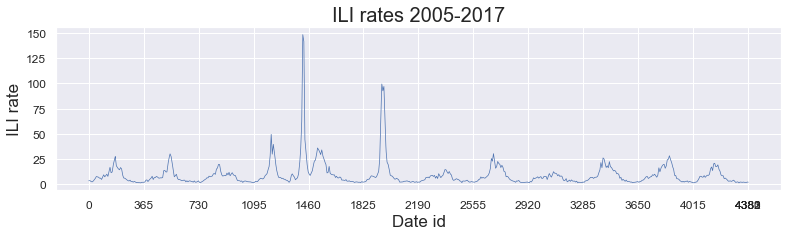

      id        Date
0      0  24/08/2005
1    365  24/08/2006
2    730  24/08/2007
3   1095  23/08/2008
4   1460  23/08/2009
5   1825  23/08/2010
6   2190  23/08/2011
7   2555  22/08/2012
8   2920  22/08/2013
9   3285  22/08/2014
10  3650  22/08/2015
11  4015  21/08/2016
12  4380  21/08/2017


In [3]:
def firstGlanceInfo():
    plt.figure(figsize=(13,3))
    sns.set(style="darkgrid") 

    yearIntervals = 365
    id = [i for i in range(0, 4383)]
    xAxisRange = list(range(0,4383,yearIntervals)) + [4381,4382,4383]

    plt.xlabel('Date id', fontsize=17)
    plt.ylabel('ILI rate', fontsize=17)
    plt.title('ILI rates 2005-2017', fontsize=20)

    plt.plot( id ,data['ILI rates'], linewidth=0.7)
    plt.xticks(xAxisRange , fontsize= 12)
    plt.yticks(fontsize= 12)
    plt.show()

    dateStrings = list(data.Date)
    idDates = pd.DataFrame()
    idDates['id'] = xAxisRange[:-3]
    idDates['Date'] = [dateStrings[i] for i in xAxisRange[:-3]]
    print(idDates)

firstGlanceInfo()


### Finding the Pearson Coefficient of the top 50 queries within a 300 samplesize

In [10]:
from scipy.stats.stats import pearsonr


numberOfTopQueries = 250
outOf1000 = 1000

def ourPearsonCoeff(query, days):
    topQueries = []
    for querySearched in query:
        pc = pearsonr(data[querySearched][0:days],data['ILI rates'][0:days] )
        topQueries.append((pc[0], querySearched))
    topQueries.sort(key = lambda x: x[0], reverse=True)
    topQueries = topQueries[0:numberOfTopQueries]
    
    tablePC = pd.DataFrame()
    tablePC['Query'] = [x[1] for x in topQueries]
    tablePC['Pearson Coefficient'] = [x[0] for x in topQueries]
    onlyQueries = [x[1] for x in topQueries]
#     print(onlyQueries)
    return topQueries
    
 ## A list of tuples of (Pearson, Query)



### Splitting the Data into training and testing W/O normalisation

In [11]:
currentDataset = []
predictingILI = list(data['ILI rates'])
meanAndSDOfQueries = []
meanAndSDOfILI = []
def makeQueries(days):
    searchTerms1 = ourPearsonCoeff(list(data.columns[2:outOf1000]), days)
    for eachSearchTerm in searchTerms1:
        currentDataset.append(list(data[eachSearchTerm[1]]))
    

def queryTrainingPeriod(days, normalise):
    trainingX = []
    makeQueries(days)
    if normalise == "yes":
        for i in currentDataset:
            newValues = []
            myMean = statistics.mean(i[:days])
            sD = statistics.stdev(i[:days])
            meanAndSDOfQueries.append((myMean,sD))
            for j in i[:days]:
                newValues.append((j-myMean)/sD)
            trainingX.append(newValues)
    else:
        for i in currentDataset:
            trainingX.append(i[:days])
    return trainingX

def ILITrainingPeriod(days, normalise):
    if normalise == "yes":
        newILI = []
        myMean = statistics.mean(predictingILI[0:days])
        sD = statistics.stdev(predictingILI[0:days])
        meanAndSDOfILI.append((myMean,sD))
        for i in predictingILI[0:days]:
            newILI.append((i-myMean)/sD)
        return newILI
    else:
        return predictingILI[:days]

def queryTestPeriod(days, normalise):
    testX = []
    if normalise == "yes":
        j = 0
        for i in currentDataset:
            newQuery = []
            for z in i[days:days+365]:    
                newQuery.append((z-meanAndSDOfQueries[j][0])/meanAndSDOfQueries[j][1])
            j+=1
            testX.append(newQuery)
        return testX
    else:   
        for i in currentDataset:
            testX.append(i[days:days+365])
        return testX
    
def ILITestPeriod(days, normalise):
    if normalise == "yes":
        newILItest = []
        for i in predictingILI[days:days+365]:
            newILItest.append((i - meanAndSDOfILI[0][0])/meanAndSDOfILI[0][1])
        return newILItest
    else:
        return predictingILI[days:days+365]

fold1 = 2555
fold2 = 2920
fold3 = 3285
fold4 = 3650
fold5 = 4015


### OLS and Bayesian

In [19]:
def splitDataAndInitiateModel(fold, normalise):
    trainingX = np.array(queryTrainingPeriod(fold, normalise)).T
    trainingY = ILITrainingPeriod(fold, normalise)

    
    testX = np.array(queryTestPeriod(fold, normalise)).T 
    originalTestY = ILITestPeriod(fold, normalise)
    
    
    ols = linear_model.LinearRegression()
    ols.fit(trainingX, trainingY)
    
    bay = linear_model.BayesianRidge()
    bay.fit(trainingX, trainingY)
     
#     print(ols.get_params(deep="True"))
#     print('Intercept: \n', ols.intercept_)
#     print('Coefficients: \n', ols.coef_)
        
    predictionO = list(ols.predict(testX))
    predictionB = list(bay.predict(testX))

    
    
    id = [i for i in range(fold, fold+365)]
    plt.figure(figsize=(13,3))
    plt.xlabel('Date id', fontsize=17)
    plt.ylabel('ILI rate', fontsize=17)
    plt.title('ILI rates '+ str(fold) + ' - ' + str(fold+365), fontsize=20)
    
    plt.plot(id, originalTestY, linewidth=0.7)
    plt.plot(id, predictionO, linewidth=0.7)
    plt.plot(id, predictionB, linewidth=0.7)

    
    plt.xticks(fontsize= 12)
    plt.yticks(fontsize= 12)
    plt.legend(['Original', 'PredictedO', 'PredictedB'], loc='upper left')
    plt.show()
    
    showMetrics("OLS",originalTestY, predictionO)
    showMetrics("Bayseian Ridge Regression",originalTestY, predictionB)
    print("bayesian alpha is", bay.alpha_)

    meanAndSDOfQueries = []
    meanAndSDOfILI = []
    currentDataset = []
    
def showMetrics(model,originalTestY, predictionY):
    mse = mean_squared_error(originalTestY, predictionY)
    rmse = sqrt(mse)
    mae = mean_absolute_error(originalTestY, predictionY)
    rmae = sqrt(mae)
    rSquared = r2_score(originalTestY, predictionY)
    pc = pearsonr(originalTestY, predictionY)
    print(model)
    print("MSE = ", mse)
#     print("RMSE = ", rmse)
    print("MAE = ", mae)
#     print("RMAE = ", rmae)
#     print("R-SQUARED = ", rSquared)
    print("P-Correlation = ", pc)


normalise = "no"
# splitDataAndInitiateModel(fold1, normalise)
# splitDataAndInitiateModel(fold2, normalise)
# splitDataAndInitiateModel(fold3, normalise)
# splitDataAndInitiateModel(fold4, normalise)
# splitDataAndInitiateModel(fold5, normalise)


### Ridge Regression

In [ ]:
def trainRidge(fold, alphas):
    trainingX = np.array(queryTrainingPeriod(fold, normalise)).T
    trainingY = ILITrainingPeriod(fold, normalise)
    
    testX = np.array(queryTestPeriod(fold, normalise)).T 
    originalTestY = ILITestPeriod(fold, normalise)
    
    clf = linear_model.RidgeCV(alphas)
    clf.fit(trainingX, trainingY)

    print("Alpha is ", clf.alpha_)
    
    cfr = linear_model.Ridge(alpha = clf.alpha_)
    cfr.fit(trainingX, trainingY)

    # Check error on test set
    predictionR = cfr.predict(testX)
    id = [i for i in range(fold, fold+365)]
    plt.figure(figsize=(13,3))
    plt.xlabel('Date id', fontsize=17)
    plt.ylabel('ILI rate', fontsize=17)
    plt.title('ILI rates '+ str(fold) + ' - ' + str(fold+365), fontsize=20)
    
    plt.plot(id, originalTestY, linewidth=0.7)
    plt.plot(id, predictionR, linewidth=0.7)
    
    plt.xticks(fontsize= 12)
    plt.yticks(fontsize= 12)
    plt.legend(['Original','PredictionR'], loc='upper left')
    plt.show()
    showMetrics("Ridge",originalTestY, predictionR)

# alphas1 = np.arange(10,1000,10)
# trainRidge(2555, alphas1, "10-1000")

alphas1 = np.arange(0.001,20,0.001)
trainRidge(2555, alphas1)

